In [1]:
pip install librosa soundfile numpy scikit-learn pyaudio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

In [3]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        x=sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(x))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=x,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=x,sr=sample_rate).T,axis=0)
            result=np.hstack((result,mel))
    return result

In [4]:
emotions={
    '01': "neutral",
    '02': "calm",
    '03': "happy",
    '04': "sad",
    '05': "angry",
    '06': "fearful",
    '07': "disgust",
    '08': "surprised"
}
observed_emotions=['neutral', 'calm', 'happy']

In [5]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\SOUMIL MAITI\\Downloads\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

In [14]:
x_train,x_test,y_train,y_test=load_data(test_size=0.1)

In [15]:
model = MLPClassifier( alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate= "adaptive", max_iter=8000 )
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=8000)

In [16]:
y_pred=model.predict(x_test)

In [17]:
acc=accuracy_score(y_true=y_test,y_pred=y_pred)
print(acc*100.0)

81.25


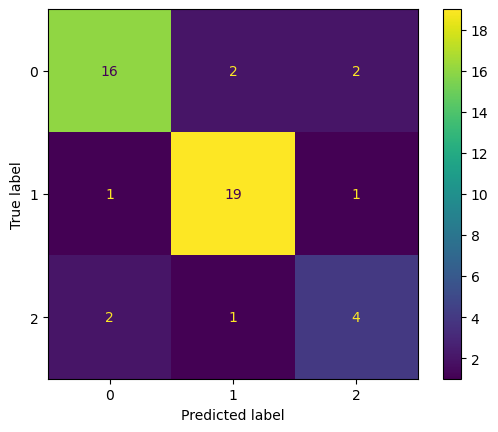

In [21]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();